## NB - binary classification

#### "is_from_NorthAmerica" -> non va molto bene

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [139]:
pp_train = pd.read_csv("pp_train.csv")
pp_test = pd.read_csv("pp_test.csv")

pp_class = pp_train.copy()
pp_test_class = pp_test.copy()

TRAIN DI PRIMA -> senza features da "countryofOrigin" in poi
'originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe'

## tolgo record con outliers -> commentato perchè ris simili o poco peggio

In [140]:
# pp_class = pp_class[pp_class['outlier']!=True]
# pp_test_class = pp_test_class[pp_test_class['outlier']!=True]

In [141]:
#pp_class.head()

one hot encoding title type


In [142]:
from sklearn.preprocessing import OneHotEncoder

# Estrai la colonna da codificare
title_type = pp_class[['titleType']]
title_type_test = pp_test_class[['titleType']]

# Inizializza l'encoder
encoder = OneHotEncoder(sparse=False, drop=None)  # drop='first' se vuoi evitare collinearità

# Esegui la codifica
title_encoded = encoder.fit_transform(title_type)
title_encoded_test = encoder.fit_transform(title_type_test)

# Crea un DataFrame con i nomi delle colonne
title_encoded_df = pd.DataFrame(title_encoded, columns=encoder.get_feature_names_out(['titleType']))
title_encoded_df_test = pd.DataFrame(title_encoded_test, columns=encoder.get_feature_names_out(['titleType']))


# Unisci al dataset originale
pp_class= pd.concat([pp_class.reset_index(drop=True), title_encoded_df], axis=1)
pp_test_class= pd.concat([pp_test_class.reset_index(drop=True), title_encoded_df_test], axis=1)


# (Facoltativo) Rimuovi la colonna originale
pp_class#.drop(columns=['titleType'], inplace=True)


C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,runtimeMinutes_notitletype_imputed,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,21,...,89.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,24,...,75.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,60.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,80.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16167,Caprices,6,1942,1942.0,NaN,0.0,73,4,0,45,...,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16168,Haar Jeet,5,1990,1990.0,NaN,0.0,15,2,0,22,...,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16169,Kotigobba 3,6,2021,2021.0,140.0,0.0,2560,39,3,129,...,140.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16170,Ator l'invincibile,4,1982,1982.0,NaN,0.0,3011,52,1,53,...,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
pp_class.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'countryOfOrigin', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryO

## Filtro dataset su classi meno rappresentate -> capire se 1,5,6,9 o 7,8,9

In [144]:
 #pp_class = pp_class[~pp_class['titleType_encoded'].isin([7,8, 9])]
## pp_test_class = pp_test_class[~pp_test_class['titleType_encoded'].isin([7,8, 9])]

### Selezione variabile target

In [145]:
y_train = np.array(pp_class['is_from_North America'])  # Il target originale
y_test = np.array(pp_test_class["is_from_North America"])

### preprocessing variabili

In [146]:
pp_class['canHaveEpisodes'] = pp_class['canHaveEpisodes'].astype(int)
pp_test_class['canHaveEpisodes'] = pp_test_class['canHaveEpisodes'].astype(int)

In [147]:
column2drop = ['originalTitle', 'runtimeMinutes']
pp_class.drop(column2drop, axis=1, inplace=True)
pp_test_class.drop(column2drop, axis=1, inplace=True)

#### endYear da gestire

In [148]:
pp_class= pp_class.drop(["endYear"], axis=1)
pp_test_class= pp_test_class.drop(["endYear"], axis=1)

#### Binarizzazione da capire

In [149]:
#1 binarizzazione (0 / >0) per le variabili con tanti zeri (consigliato per NB)

pp_class['totalNominations_bin'] = (pp_class['totalNominations'] > 0).astype(int)
pp_class['totalMedia_bin'] = (pp_class['totalMedia'] > 0).astype(int)

pp_test_class['totalNominations_bin'] = (pp_test_class['totalNominations'] > 0).astype(int)
pp_test_class['totalMedia_bin'] = (pp_test_class['totalMedia'] > 0).astype(int)



In [150]:
# #2 discretizzazione per fasce 
# #total media
# bins_tm = [-1, 0, 1, 8, 50, float('inf')]
# labels_tm = [0, 1, 2, 3, 4]  # Mantengo valori numerici per compatibilità con algoritmi
# pp_class['totalMedia_bin'] = pd.cut(pp_class['totalMedia'], bins=bins_tm, labels=labels_tm, right=False)
# pp_test_class['totalMedia_bin'] = pd.cut(pp_test_class['totalMedia'], bins=bins_tm, labels=labels_tm, right=False)

# #total nom
# bins_tnom = [-1, 0, 2, 10,  float('inf')]
# labels_tnom = [0, 1, 2, 3]  # Mantengo valori numerici per compatibilità con algoritmi
# pp_class['totalNominations_bin'] = pd.cut(pp_class['totalNominations'], bins=bins_tnom, labels=labels_tnom, right=False)
# pp_test_class['totalNominations_bin'] = pd.cut(pp_test_class['totalNominations'], bins=bins_tnom, labels=labels_tnom, right=False)

# # # Assicurati che le nuove colonne siano di tipo numerico
# pp_class['totalNominations_bin'] = pp_class['totalNominations_bin'].astype(int)
# pp_test_class['totalNominations_bin'] = pp_test_class['totalNominations_bin'].astype(int)

# pp_class['totalMedia_bin'] = pp_class['totalMedia_bin'].astype(int)
# pp_test_class['totalMedia_bin'] = pp_test_class['totalMedia_bin'].astype(int)


In [151]:
#0>0
# pp_class['awardWins_bin'] = (pp_class['awardWins'] > 0).astype(int)
# pp_class['totalVideos_bin'] = (pp_class['totalVideos'] > 0).astype(int)
# pp_class['awardNominationsExcludeWins_bin'] = (pp_class['awardNominationsExcludeWins'] > 0).astype(int)


# pp_test_class['awardWins_bin'] = (pp_test_class['awardWins'] > 0).astype(int)
# pp_test_class['totalVideos_bin'] = (pp_test_class['totalVideos'] > 0).astype(int)
# pp_test_class['awardNominationsExcludeWins_bin'] = (pp_test_class['awardNominationsExcludeWins'] > 0).astype(int)

#FASCE
# bins_awards = [0, 1, 10, float('inf')]
# labels_awards = [0, 1, 2]  # Mantengo valori numerici per compatibilità con algoritmi
# pp_class['awardWins_bin'] = pd.cut(pp_class['awardWins'], bins=bins_awards, labels=labels_awards, right=False)
# ## pp_test_class['awardWins_bin'] = pd.cut(pp_test_class['awardWins'], bins=bins_awards, labels=labels_awards, right=False)



# bins_videos = [0, 1, 6, float('inf')]
# labels_videos = [0, 1, 2]
# pp_class['totalVideos_bin'] = pd.cut(pp_class['totalVideos'], bins=bins_videos, labels=labels_videos, right=False)
# ## pp_test_class['totalVideos_bin'] = pd.cut(pp_test_class['totalVideos'], bins=bins_videos, labels=labels_videos, right=False)



# bins_nom = [0, 1, 5, float('inf')]
# labels_nom = [0, 1, 2]
# pp_class['awardNominationsExcludeWins_bin'] = pd.cut(pp_class['awardNominationsExcludeWins'], 
#                                                     bins=bins_nom, 
#                                                     labels=labels_nom, 
#                                                     right=False)
# ## pp_test_class['awardNominationsExcludeWins_bin'] = pd.cut(pp_train_class['awardNominationsExcludeWins'], 
# #                                                    bins=bins_nom, 
# #                                                    labels=labels_nom, 
# #                                                    right=False)



# # Assicurati che le nuove colonne siano di tipo numerico
# pp_class['awardWins_bin'] = pp_class['awardWins_bin'].astype(int)
# pp_class['totalVideos_bin'] = pp_class['totalVideos_bin'].astype(int)
# pp_class['awardNominationsExcludeWins_bin'] = pp_class['awardNominationsExcludeWins_bin'].astype(int)

# ## pp_test_class['awardWins_bin'] = pp_test_class['awardWins_bin'].astype(int)
# ## pp_test_class['totalVideos_bin'] = pp_test_class['totalVideos_bin'].astype(int)
# ## pp_test_class['awardNominationsExcludeWins_bin'] = pp_test_class['awardNominationsExcludeWins_bin'].astype(int)


## array di valori per selezione feature classificazione

In [152]:
X_train = pp_class[[
       'rating',
       'startYear',  
       'numVotes', 
       'totalCredits', 
       'criticReviewsTotal',
       'canHaveEpisodes', 
       'userReviewsTotal',
       'fill_runtimeMinutes_Bruno',
       'totalNominations_bin',
        'titleType_movie','titleType_short', 'titleType_tvEpisode', 'titleType_tvMiniSeries','titleType_tvMovie', 'titleType_tvSeries', 'titleType_tvShort', 'titleType_tvSpecial', 'titleType_video'
       #'totalMedia_bin',
       #'countryOfOrigin_freq_enc', ## -> migliora di troppo
       ]].values

X_test = pp_test_class[[ 
           'rating',
       'startYear',  
       'numVotes', 
       'totalCredits', 
       'criticReviewsTotal',
       'canHaveEpisodes', 
       'userReviewsTotal',
       'fill_runtimeMinutes_Bruno',
       'totalNominations_bin',
       'titleType_movie','titleType_short', 'titleType_tvEpisode', 'titleType_tvMiniSeries','titleType_tvMovie', 'titleType_tvSeries', 'titleType_tvShort', 'titleType_tvSpecial', 'titleType_video'
       #'totalMedia_bin',
       #'countryOfOrigin_freq_enc', ## -> migliora di troppo
]].values

In [153]:
# prove su variabili 

# X_train = pp_class[[
#        'rating',
#        'startYear',  
#        'numVotes', 
#        'totalCredits', 
#        'criticReviewsTotal',
#        #'canHaveEpisodes', 
#        #'isAdult', 
#        #'numRegions', 
#        'userReviewsTotal', #lasciare
#        #'endYear',
#        'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery',  'is_Talk-Show', 'is_Drama', 'is_Sport', 'is_War', 'is_Horror','is_Animation', 
#        #'fill_runtimeMinutes', 
#        #'is_from_Oceania','is_from_North America', 'is_from_South America', 'is_from_Asia', 'is_from_Africa', 'is_from_Europe', 
#        ##'awardWins_bin',  
#        ##'totalVideos_bin', 
#        ##'awardNominationsExcludeWins_bin', 
#        ##'countryOfOrigin', 
#        ##'countryOfOrigin_freq_enc', ## -> migliora di troppo
#        ##'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA','countryOfOrigin_UNK', 
#        'fill_runtimeMinutes_Bruno',
#        ##'totalNominations',
#        ##'totalMedia', 
#        'totalNominations_bin',
#        #totalMedia_bin',
#        #'runtimeMinutes_notitletype'      #in teoria qua non serve?
#        ]].values

# ## X_test = pp_test_class[[ ]].values

### Splitting in validation

In [154]:
X_train2, X_val, y_train2, y_val = train_test_split(
     X_train, y_train, test_size=0.2, random_state=32)

In [155]:
print(X_train2.shape, X_val.shape, X_train.shape,
      #, X_test.shape
      )

(12937, 18) (3235, 18) (16172, 18)


Normalizzazione

In [156]:
X_train2_log = np.log1p(X_train2)
X_val_log= np.log1p(X_val)

X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

In [157]:
standardsc = StandardScaler()

        # # Fitta e trasforma il training set in un solo passaggio
X_train2_standardsc = standardsc.fit_transform(X_train2_log)
X_val_standardsc = standardsc.fit_transform(X_val_log)

X_train_standardsc = standardsc.fit_transform(X_train_log)
# # Trasforma il test set (senza rifittare!)
X_test_standardsc = standardsc.transform(X_test_log)

In [158]:
# minmax = MinMaxScaler()

        ## Fitta e trasforma il training set in un solo passaggio
# X_train2_minmax = minmax.fit_transform(X_train2_log)
# X_val_minmax = minmax.fit_transform(X_val_log)

## X_train_minmax = minmax.fit_transform(X_train_log)
        # # Trasforma il test set (senza rifittare!)
# #X_test_minmax = minmax.transform(X_test)

In [159]:
X_train2_tr = X_train2_standardsc
X_val_tr = X_val_standardsc

X_train_tr = X_train_standardsc
X_test_tr = X_test_standardsc

## NAIVE BAYES

### Gaussian

In [160]:
clf = GaussianNB()
#clf = ComplementNB(alpha=1.0) -> non va perchè ci sono valori negativi
#clf = CategoricalNB()
clf.fit(X_train2_tr, y_train2)

GaussianNB()

Predicting on validation set

In [161]:
y_pred = clf.predict(X_val_tr)

In [162]:
print(len(y_pred))  # dovrebbe stampare lo stesso numero in entrambi
print(len(y_val))  

3235
3235


In [163]:
print(set(y_val)) 
print(set(y_pred))  # se qui manca una classe rispetto a sopra vuol dire che non l'ha riconosciuta 

{0, 1}
{0, 1}


Classification report

In [164]:
print(f"Test accuracy: {accuracy_score(y_val, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Test accuracy: 0.6494590417310665

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1693
           1       0.62      0.68      0.65      1542

    accuracy                           0.65      3235
   macro avg       0.65      0.65      0.65      3235
weighted avg       0.65      0.65      0.65      3235



In [165]:
clf.predict_proba(X_val_tr)
#prob che un record appartenga alle classi

array([[8.96686601e-01, 1.03313399e-01],
       [4.31314348e-01, 5.68685652e-01],
       [9.65328780e-01, 3.46712198e-02],
       ...,
       [9.99667035e-01, 3.32965455e-04],
       [8.83911052e-01, 1.16088948e-01],
       [1.10429107e-01, 8.89570893e-01]])

overfitting

Performance sul Training set:
Accuracy: 0.6543
F1 Score: 0.6542

Performance sul Validation set:
Accuracy: 0.6495
F1 Score: 0.6495


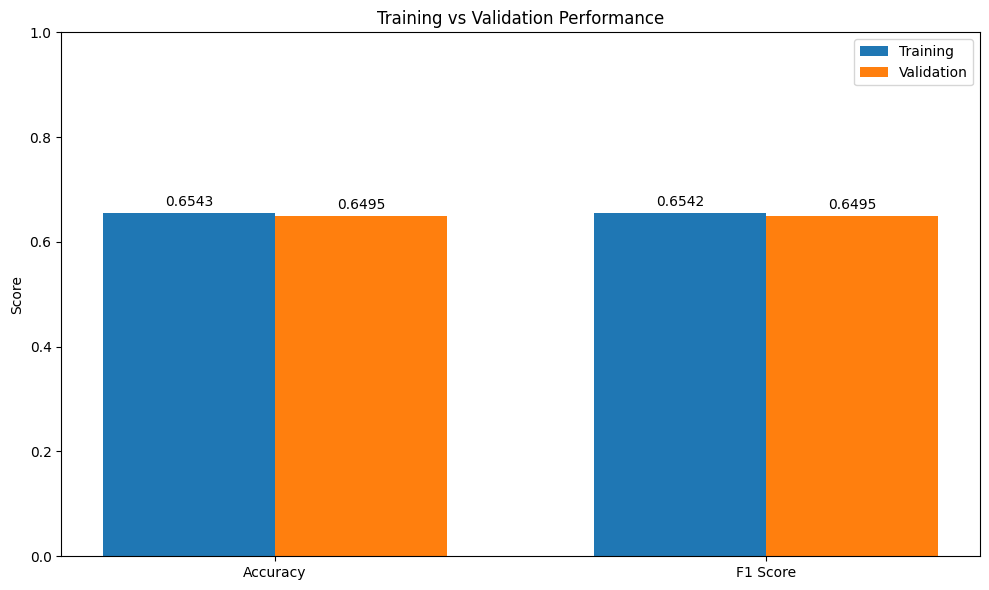

In [166]:
# Importazioni necessarie (se non già importate)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Valutazione sul training set
y_pred_train = clf.predict(X_train2_tr)
train_accuracy = accuracy_score(y_train2, y_pred_train)
train_f1 = f1_score(y_train2, y_pred_train, average='weighted')

# Valutazione sul validation set
y_pred_val = clf.predict(X_val_tr)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val, average='weighted')

# Stampa dei risultati
print(f"Performance sul Training set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nPerformance sul Validation set:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")

# Visualizzazione grafica del confronto
metrics = ['Accuracy', 'F1 Score']
train_scores = [train_accuracy, train_f1]
val_scores = [val_accuracy, val_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training')
rects2 = ax.bar(x + width/2, val_scores, width, label='Validation')

ax.set_ylabel('Score')
ax.set_title('Training vs Validation Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Aggiungi i valori sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

ROC curve

In [167]:
print("y_val shape:", y_val.shape)
print("y_val dtype:", y_val.dtype)
print("primi elementi di y_val:", y_val[:5])  # Mostra i primi 5 elementi

y_val shape: (3235,)
y_val dtype: int64
primi elementi di y_val: [0 0 0 0 0]


In [168]:
# plot_roc(y_val, clf.predict_proba(X_val_tr))
# plt.show()
# print(roc_auc_score(y_val, clf.predict_proba(X_val_tr), multi_class="ovr", average="macro"))

prova 2 roc

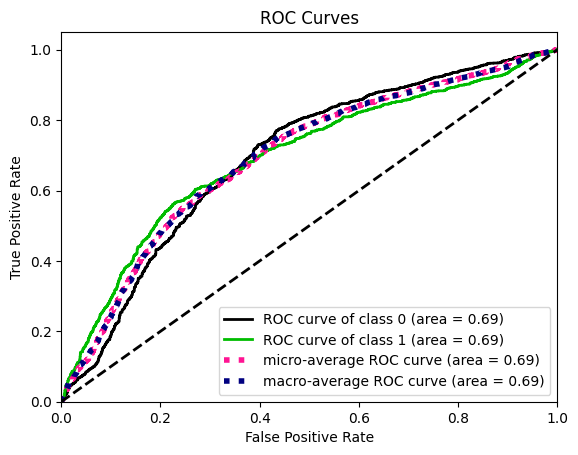

0.6940164467560406


In [169]:
import scikitplot as skplt

# Ottieni le probabilità di tutte le classi
probs = clf.predict_proba(X_val_tr)

# Passa l'intero array di probabilità, non solo una colonna
skplt.metrics.plot_roc(y_val, probs)
plt.show()

# Per il calcolo di AUC, se è binario, puoi usare:
print(roc_auc_score(y_val, probs[:, 1]))

Confusion matrix

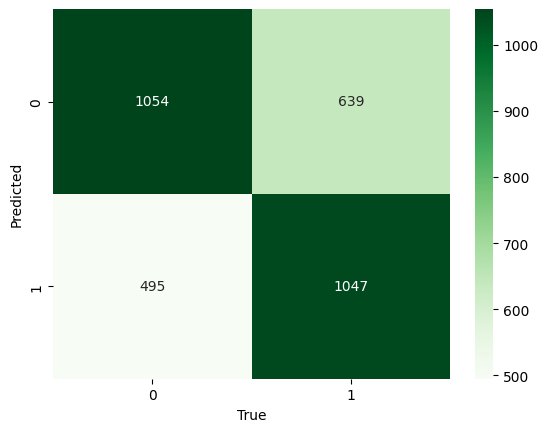

In [170]:
classes_unique = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=classes_unique, 
            yticklabels=classes_unique)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

Distribuzioni classi nel train2

In [171]:
class_distribution = pd.Series(y_train2).value_counts().sort_index()

# Mostra i conteggi
print("Distribuzione delle classi nel training set:")
print(class_distribution)

Distribuzione delle classi nel training set:
0    6760
1    6177
Name: count, dtype: int64


## Proper testing on the test set

In [172]:
clf = GaussianNB()
# clf = ComplementNB()
clf.fit(X_train_tr, y_train)
y_pred = clf.predict(X_test_tr)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Performance sul Training set:
Accuracy: 0.6578
F1 Score: 0.6579

Performance sul test set:
Accuracy: 0.6582
F1 Score: 0.6584


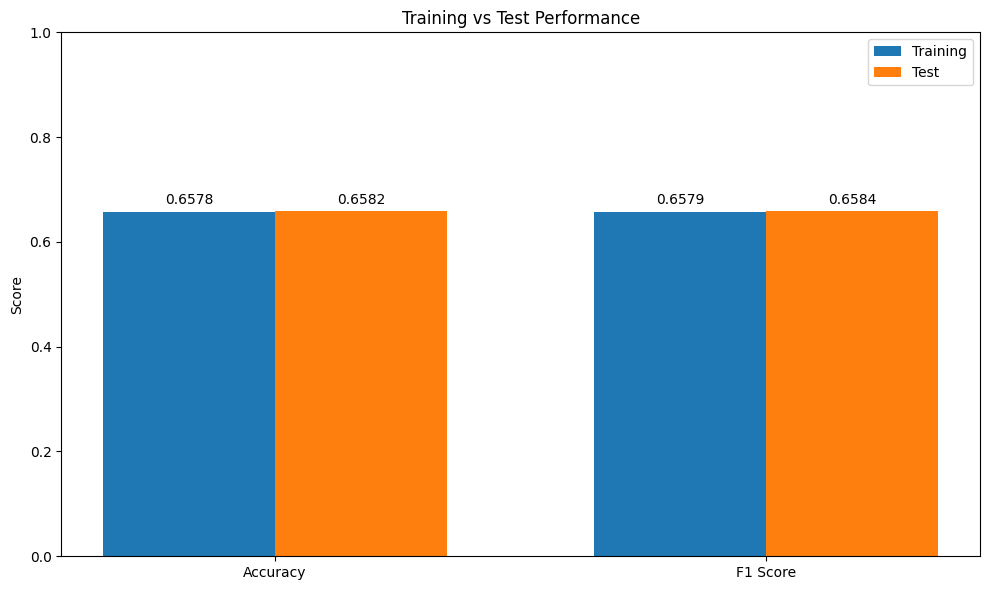

In [173]:
# Importazioni necessarie (se non già importate)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Valutazione sul training set
y_pred_train = clf.predict(X_train_tr)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

# Valutazione sul test set
y_pred_test = clf.predict(X_test_tr)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
                        ### gaia ha messo y_tpred

# Stampa dei risultati
print(f"Performance sul Training set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nPerformance sul test set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Visualizzazione grafica del confronto
metrics = ['Accuracy', 'F1 Score']
train_scores = [train_accuracy, train_f1]
test_scores = [test_accuracy, test_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

ax.set_ylabel('Score')
ax.set_title('Training vs Test Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Aggiungi i valori sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [174]:
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test accuracy: 0.6582466567607727

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2844
           1       0.64      0.65      0.64      2540

    accuracy                           0.66      5384
   macro avg       0.66      0.66      0.66      5384
weighted avg       0.66      0.66      0.66      5384



In [175]:
clf.predict_proba(X_test_tr)
#prob che un record appartenga alle classi

array([[1.41989936e-06, 9.99998580e-01],
       [1.61853303e-01, 8.38146697e-01],
       [2.01804162e-22, 1.00000000e+00],
       ...,
       [8.93304866e-01, 1.06695134e-01],
       [9.86272335e-01, 1.37276653e-02],
       [1.00000000e+00, 1.04506198e-28]])

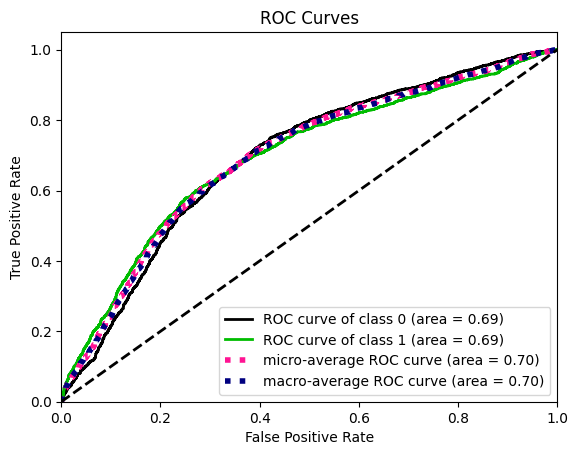

0.6949814224171346


In [176]:
import scikitplot as skplt

# Ottieni le probabilità di tutte le classi
probs = clf.predict_proba(X_test_tr)

# Passa l'intero array di probabilità, non solo una colonna
skplt.metrics.plot_roc(y_test, probs)
plt.show()

# Per il calcolo di AUC, se è binario, puoi usare:
print(roc_auc_score(y_test, probs[:, 1]))

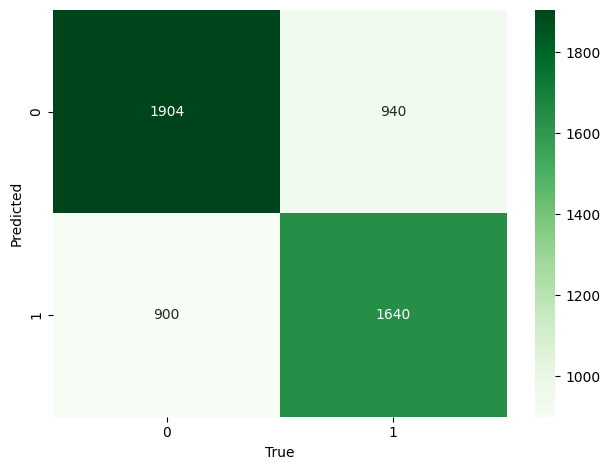

In [177]:
classes_unique = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=classes_unique, 
            yticklabels=classes_unique)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

### devo cambiare qlcs? Dummy classifier

In [178]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create dummy classifier (most frequent class strategy)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_tr, y_train)

# Predict and evaluate
y_pred = dummy.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5282317979197623
Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      2844
           1       0.00      0.00      0.00      2540

    accuracy                           0.53      5384
   macro avg       0.26      0.50      0.35      5384
weighted avg       0.28      0.53      0.37      5384



C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# "lowEngagement"

In [179]:
pp_class["lowEngagement"] = (pp_class["numVotes"]<100).astype(int)
pp_test_class["lowEngagement"] = (pp_test_class["numVotes"]<100).astype(int)

In [180]:
x = sum(pp_class["lowEngagement"] == 1)
x

11105

Selezione variabile target

In [181]:
y_train = np.array(pp_class["lowEngagement"]) #target originale
y_test = np.array(pp_test_class["lowEngagement"])

Selezione attributi per classificazione

In [182]:
X_train = pp_class[[
       'rating',
       'totalCredits', 
       'canHaveEpisodes', 
       'numRegions', 
       'countryOfOrigin_freq_enc',
       'fill_runtimeMinutes_Bruno',  
       'totalNominations_bin',
       'totalMedia_bin',
       'startYear',
       #'criticReviewsTotal', # FORSEEEE toglere perchè simili
       #'userReviewsTotal', # toglirtr perchè simile
       ]].values

X_test = pp_test_class[[      
       'rating',
       'totalCredits', 
       'canHaveEpisodes', 
       'numRegions', 
       'countryOfOrigin_freq_enc',
       'fill_runtimeMinutes_Bruno',  
       'totalNominations_bin',
       'totalMedia_bin',
       'startYear', 
       #'criticReviewsTotal', # FORSEEEE toglere perchè simili
       #'userReviewsTotal', # toglirtr perchè simile
       ]].values

In [183]:
#studio variabili da usare

# X_train = pp_class[[
#        'rating',
#        #'startYear',  
#        #'numVotes', 
#        'totalCredits',  
#        'criticReviewsTotal', # FORSEEEE toglere perchè simili
#        ##'canHaveEpisodes', 
#        ##'isAdult',  -> era simie
#        'numRegions', 
#        'userReviewsTotal', # toglirtr perchè simile
#        ##'endYear',
#        #'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery',  'is_Talk-Show', 'is_Drama', 'is_Sport', 'is_War', 'is_Horror','is_Animation', 
#        #'fill_runtimeMinutes',  #lasciare
#        #'is_from_Oceania','is_from_North America', 'is_from_South America', 'is_from_Asia', 'is_from_Africa', 'is_from_Europe', 
#        ##'awardWins_bin',  
#        ##'totalVideos_bin', 
#        ##'awardNominationsExcludeWins_bin', 

#        #'countryOfOrigin', 
#        'countryOfOrigin_freq_enc',
#        #'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA','countryOfOrigin_UNK', 
#        'fill_runtimeMinutes_Bruno',  
#        #'totalNominations',
#        #'totalMedia', 
#        'totalNominations_bin',
#       # 'totalMedia_bin',
#       # 'runtimeMinutes_notitletype' 
#        ]].values

# ## X_test = pp_test_class[[ ]].values

Splitting in train-validation

In [184]:
X_train2, X_val, y_train2, y_val = train_test_split(
     X_train, y_train, test_size=0.2, random_state=32)

normalizzazione

In [185]:
X_train2_log = np.log1p(X_train2)
X_val_log= np.log1p(X_val)

X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

In [186]:

standardsc = StandardScaler()

        # # Fitta e trasforma il training set in un solo passaggio
X_train2_standardsc = standardsc.fit_transform(X_train2_log)
X_val_standardsc = standardsc.fit_transform(X_val_log)

X_train_standardsc = standardsc.fit_transform(X_train_log)
        # # Trasforma il test set (senza rifittare!)
X_test_standardsc = standardsc.transform(X_test_log)

In [187]:
# minmax = MinMaxScaler()

        ## Fitta e trasforma il training set in un solo passaggio
# X_train2_minmax = minmax.fit_transform(X_train2_log)
# X_val_minmax = minmax.fit_transform(X_val_log)

## X_train_minmax = minmax.fit_transform(X_train_log)
        # # Trasforma il test set (senza rifittare!)
# #X_test_minmax = minmax.transform(X_test)

In [188]:
X_train2_tr = X_train2_standardsc
X_val_tr = X_val_standardsc

X_train_tr = X_train_standardsc
X_test_tr = X_test_standardsc

## Naive Bayes

In [189]:
clf = GaussianNB()
#clf = ComplementNB(alpha=1.0) #-> non va perchè ci sono valori negativi
clf.fit(X_train2_tr, y_train2)

GaussianNB()

Prediction on validation set

In [190]:
y_pred = clf.predict(X_val_tr)

In [191]:
print(len(y_pred))  # dovrebbe stampare lo stesso numero in entrambi
print(len(y_val))  

3235
3235


In [192]:
print(f"Test accuracy: {accuracy_score(y_val, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Test accuracy: 0.7653786707882535

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1014
           1       0.84      0.82      0.83      2221

    accuracy                           0.77      3235
   macro avg       0.73      0.73      0.73      3235
weighted avg       0.77      0.77      0.77      3235



In [193]:
clf.predict_proba(X_val_tr)
#prob che un record appartenga alle classi

array([[2.27708457e-01, 7.72291543e-01],
       [4.11000204e-06, 9.99995890e-01],
       [6.21712356e-08, 9.99999938e-01],
       ...,
       [9.84035008e-02, 9.01596499e-01],
       [3.84249800e-01, 6.15750200e-01],
       [5.56577585e-01, 4.43422415e-01]])

Performance sul Training set:
Accuracy: 0.7590
F1 Score: 0.7616

Performance sul Validation set:
Accuracy: 0.7654
F1 Score: 0.7667


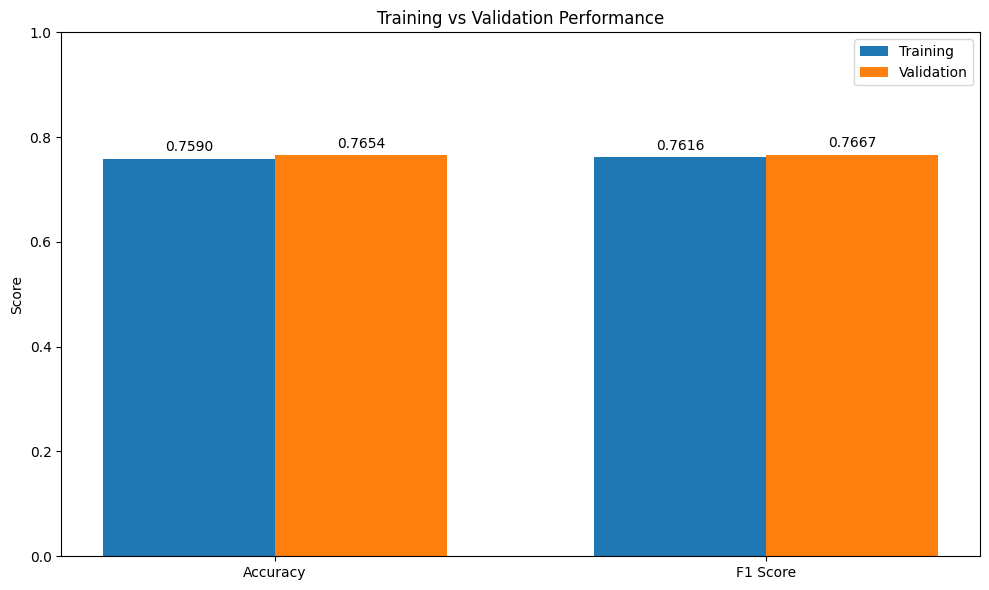

In [194]:
# Importazioni necessarie (se non già importate)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Valutazione sul training set
y_pred_train = clf.predict(X_train2_tr)
train_accuracy = accuracy_score(y_train2, y_pred_train)
train_f1 = f1_score(y_train2, y_pred_train, average='weighted')

# Valutazione sul validation set
y_pred_val = clf.predict(X_val_tr)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val, average='weighted')

# Stampa dei risultati
print(f"Performance sul Training set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nPerformance sul Validation set:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1:.4f}")

# Visualizzazione grafica del confronto
metrics = ['Accuracy', 'F1 Score']
train_scores = [train_accuracy, train_f1]
val_scores = [val_accuracy, val_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training')
rects2 = ax.bar(x + width/2, val_scores, width, label='Validation')

ax.set_ylabel('Score')
ax.set_title('Training vs Validation Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Aggiungi i valori sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

ROC curve

In [195]:
# plot_roc(y_val, clf.predict_proba(X_val_tr))
# plt.show()
# print(roc_auc_score(y_val, clf.predict_proba(X_val_tr), multi_class="ovr", average="macro"))

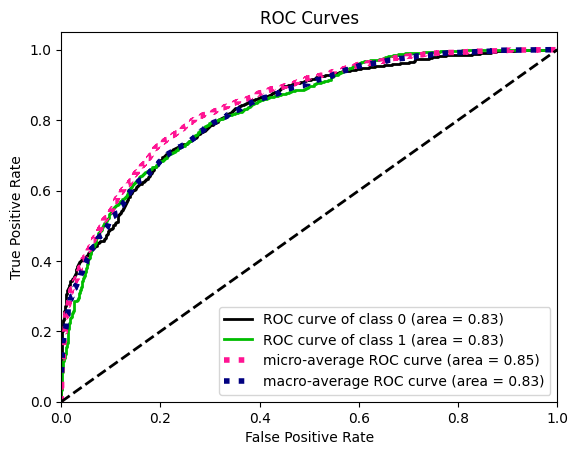

0.8299222856594796


In [196]:
import scikitplot as skplt

# Ottieni le probabilità di tutte le classi
probs = clf.predict_proba(X_val_tr)

# Passa l'intero array di probabilità, non solo una colonna
skplt.metrics.plot_roc(y_val, probs)
plt.show()

# Per il calcolo di AUC, se è binario, puoi usare:
print(roc_auc_score(y_val, probs[:, 1]))

Confusion matrix

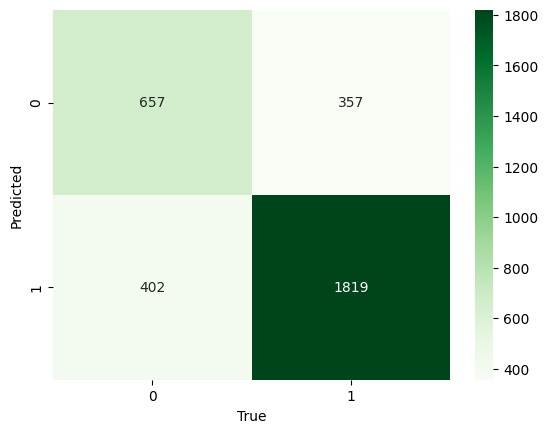

In [197]:
classes_unique = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=classes_unique, 
            yticklabels=classes_unique)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Prediction on the test set

In [198]:
clf = GaussianNB()
# clf = ComplementNB()
clf.fit(X_train_tr, y_train)
y_pred = clf.predict(X_test_tr)
y_pred

array([1, 0, 1, ..., 1, 0, 1])

Performance sul Training set:
Accuracy: 0.7613
F1 Score: 0.7638

Performance sul test set:
Accuracy: 0.7639
F1 Score: 0.7669


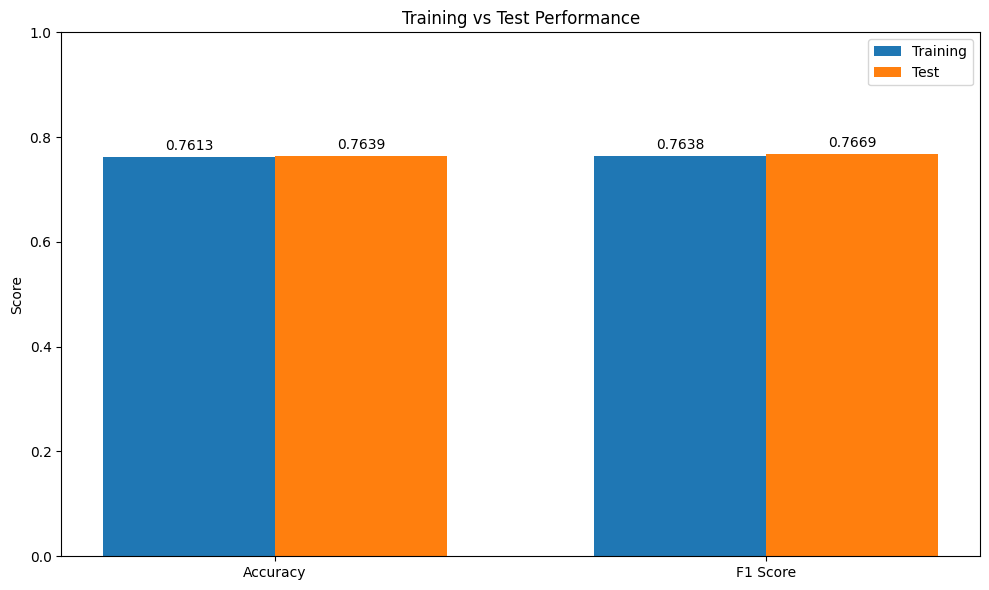

In [199]:
# Importazioni necessarie (se non già importate)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Valutazione sul training set
y_pred_train = clf.predict(X_train_tr)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

# Valutazione sul test set
y_pred_test = clf.predict(X_test_tr)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
                        ### gaia ha messo y_tpred

# Stampa dei risultati
print(f"Performance sul Training set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("\nPerformance sul test set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Visualizzazione grafica del confronto
metrics = ['Accuracy', 'F1 Score']
train_scores = [train_accuracy, train_f1]
test_scores = [test_accuracy, test_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Training')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

ax.set_ylabel('Score')
ax.set_title('Training vs Test Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Aggiungi i valori sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### risultati test

In [200]:
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test accuracy: 0.7639301634472511

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1698
           1       0.84      0.80      0.82      3686

    accuracy                           0.76      5384
   macro avg       0.73      0.74      0.73      5384
weighted avg       0.77      0.76      0.77      5384



In [201]:
clf.predict_proba(X_test_tr)
#prob che un record appartenga alle classi

array([[0.09045737, 0.90954263],
       [0.58740776, 0.41259224],
       [0.09682946, 0.90317054],
       ...,
       [0.22316889, 0.77683111],
       [0.88028291, 0.11971709],
       [0.05375369, 0.94624631]])

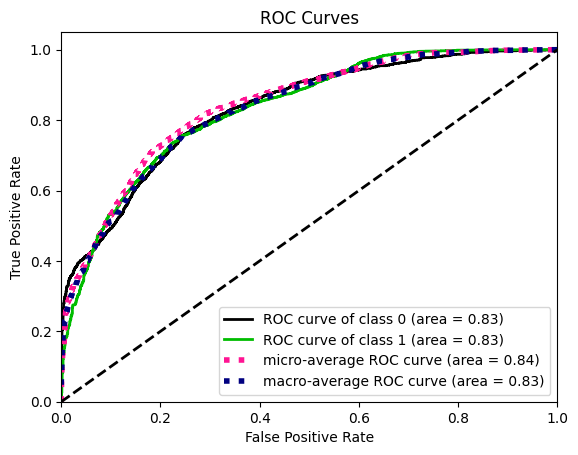

0.8325673752338297


In [202]:
import scikitplot as skplt

# Ottieni le probabilità di tutte le classi
probs = clf.predict_proba(X_test_tr)

# Passa l'intero array di probabilità, non solo una colonna
skplt.metrics.plot_roc(y_test, probs)
plt.show()

# Per il calcolo di AUC, se è binario, puoi usare:
print(roc_auc_score(y_test, probs[:, 1]))

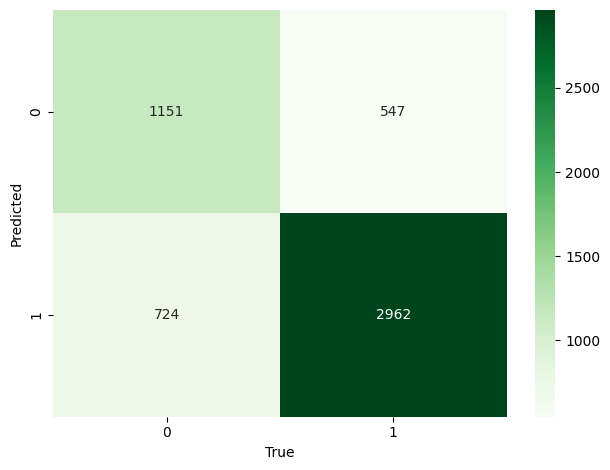

In [203]:
classes_unique = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=classes_unique, 
            yticklabels=classes_unique)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

## Dummy classifier -> cambia qlcs?

In [204]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create dummy classifier (most frequent class strategy)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_tr, y_train)

# Predict and evaluate
y_pred = dummy.predict(X_test_tr)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6846210995542348
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1698
           1       0.68      1.00      0.81      3686

    accuracy                           0.68      5384
   macro avg       0.34      0.50      0.41      5384
weighted avg       0.47      0.68      0.56      5384



C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noemi\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
